In [1]:
%matplotlib inline
from hydrophone_data_processing import load, preprocessing, tempmatch
import obspy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def minmax(data):
    min = data.min()
    max = data.max()
    return (data - min)/(max - min)

In [2]:
bubbles = load.import_bubble_detections('/media/sda/data/borehole/detections/*.csv')
bubbles.reset_index(inplace=True)

In [3]:
bubbles

,time,similarity,template_id,ones
0,2019-05-02 08:34:05.219999+00:00,0.879116,0,1
1,2019-05-02 08:34:56.173999+00:00,0.850827,0,1
2,2019-05-02 10:27:54.056999+00:00,0.860519,0,1
3,2019-05-02 12:08:43.894999+00:00,0.906010,0,1
4,2019-05-02 12:09:15.602999+00:00,0.814478,0,1
...,...,...,...,...
2494,2020-02-02 00:49:47.295000+00:00,0.827654,0,1
2495,2020-02-02 05:41:40.738000+00:00,0.814375,0,1
2496,2020-02-02 12:32:29.838000+00:00,0.818918,0,1
2497,2020-02-02 22:43:12.641000+00:00,0.817783,0,1


In [7]:
ba1d_otherpt = pd.read_excel('proposal/BA1D_p_T_2019_2020_1.xlsx')
ba1d_otherpt.columns = [c.strip() for c in ba1d_otherpt.columns]
ba1d_otherpt['Date and Time'] = pd.to_datetime(ba1d_otherpt['Date and Time'])

In [28]:
# fig, ax = plt.subplots(figsize=(15, 5))

# ax.plot(bubbles.time, bubbles.ones.cumsum(), color='darkorange', linewidth=3)

# ax2 = ax.twinx()

# ax2.plot(ba1d_otherpt['Date and Time'])

# # ax2 = ax.twinx()
# # ba1d_otherpt['Pressure (Bar)'].plot(ax=ax2, color='cyan', linewidth=2)

# # xticks = np.arange(0, 2600, 500)
# # ax.set_xticks(xticks)

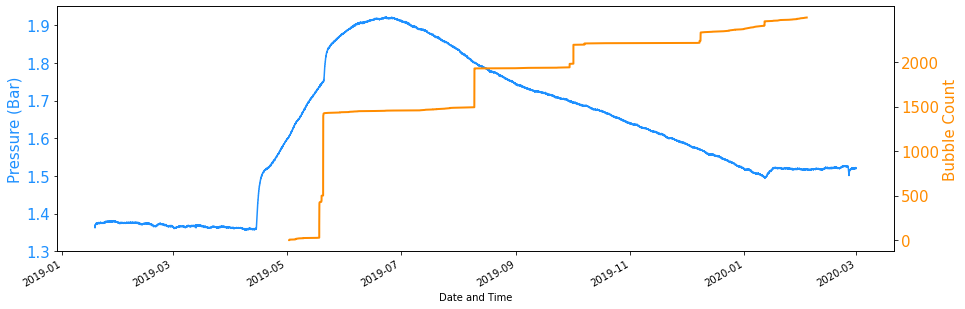

In [34]:
fig, ax = plt.subplots(figsize=(15, 5))

ba1d_otherpt.plot(x='Date and Time', y='Pressure (Bar)', ax=ax, color='dodgerblue')

ax2 = ax.twinx()
bubbles.set_index('time').ones.cumsum().plot(ax=ax2, color='darkorange', linewidth=2)

yticks = np.arange(1.3, 2.0, 0.1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, color='dodgerblue', fontsize=15)
ax.set_ylabel('Pressure (Bar)', fontsize=15, color='dodgerblue')

y2ticks = np.arange(0, 2500, 500)
ax2.set_yticks(y2ticks)
ax2.set_yticklabels(y2ticks, color='darkorange', fontsize=15)
ax2.set_ylabel('Bubble Count', fontsize=15, color='darkorange')

_lg = ax.get_legend()
_lg.remove()